# Data Processing

### Load Data

In [1]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

mpl.rcParams['axes.unicode_minus'] = False

import warnings
warnings.filterwarnings('ignore')

In [2]:
#train dataset 불러오기
#datetime을 parse_date로 불러오기 -> datetime 형식으로 불러옴

train = pd.read_csv("train.csv", parse_dates = ["datetime"])

train.shape

(10886, 12)

In [3]:
#test dataset 불러오기
#datetime을 parse_date로 불러오기 -> datetime 형식으로 불러옴

test = pd.read_csv("test.csv", parse_dates = ["datetime"])

test.shape

(6493, 9)

In [4]:
#train dataset 정보 확인

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [5]:
#test dataset 정보 확인

test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    6493 non-null   datetime64[ns]
 1   season      6493 non-null   int64         
 2   holiday     6493 non-null   int64         
 3   workingday  6493 non-null   int64         
 4   weather     6493 non-null   int64         
 5   temp        6493 non-null   float64       
 6   atemp       6493 non-null   float64       
 7   humidity    6493 non-null   int64         
 8   windspeed   6493 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(5)
memory usage: 456.7 KB


In [6]:
#train 상위 5개 dateset 보기

train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [7]:
#test 상위 5개 dateset 보기

test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


train과 test dataset 중 datetime은 분할하는 것이 좋겠음

● 연, 월, 일, 시간, 요일 분할

### Checking Missing Values

In [8]:
#train dataset의 missing values 확인

train.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

findfont: Font family ['GOTHIC'] not found. Falling back to DejaVu Sans.
findfont: Font family ['GOTHIC'] not found. Falling back to DejaVu Sans.
findfont: Font family ['GOTHIC'] not found. Falling back to DejaVu Sans.


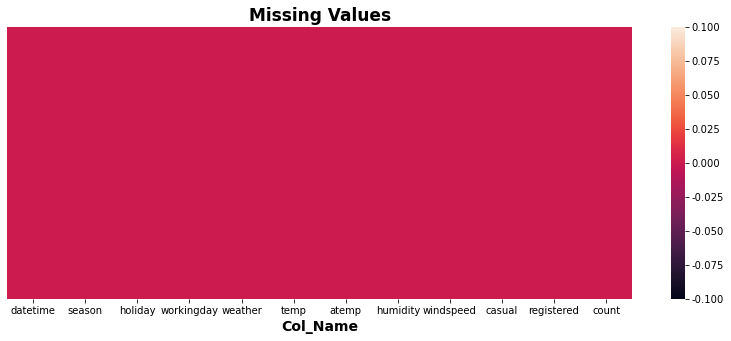

In [9]:
# train dataset의 missing values 확인 (시각화)

plt.figure(figsize = (14, 5))
sns.heatmap(train.isnull(), cbar = True, yticklabels = False)
plt.xlabel("Col_Name", size = 14, weight = "bold")
plt.title("Missing Values", fontweight = "bold", size = 17)

plt.show()

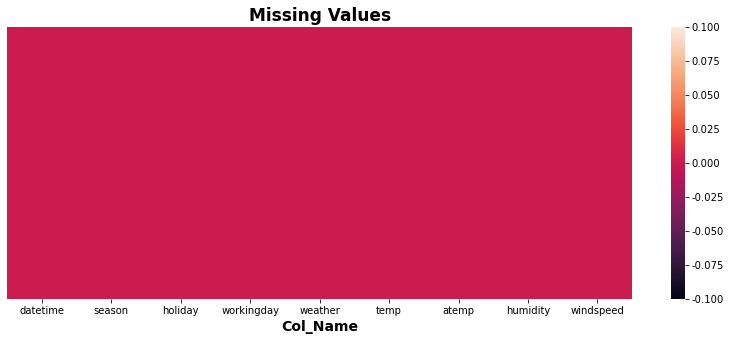

In [10]:
# test dataset의 missing values 확인

plt.figure(figsize = (14, 5))
sns.heatmap(test.isnull(), cbar = True, yticklabels = False)
plt.xlabel("Col_Name", size = 14, weight = "bold")
plt.title("Missing Values", fontweight = "bold", size = 17)

plt.show()

결측치 없음

### Split datatime column

train dataset & test dataset 
datatime column → year, month, day, hour, dayofweek

In [11]:
train["year"] = train["datetime"].dt.year
train["month"] = train["datetime"].dt.month
train["day"] = train["datetime"].dt.day
train["hour"] = train["datetime"].dt.hour
train["dayofweek"] = train["datetime"].dt.dayofweek

train.shape

(10886, 17)

In [12]:
test["year"] = test["datetime"].dt.year
test["month"] = test["datetime"].dt.month
test["day"] = test["datetime"].dt.day
test["hour"] = test["datetime"].dt.hour
test["dayofweek"] = test["datetime"].dt.dayofweek

test.shape

(6493, 14)

# EDA

### HeatMap

Check the correlation between variables

<AxesSubplot:>

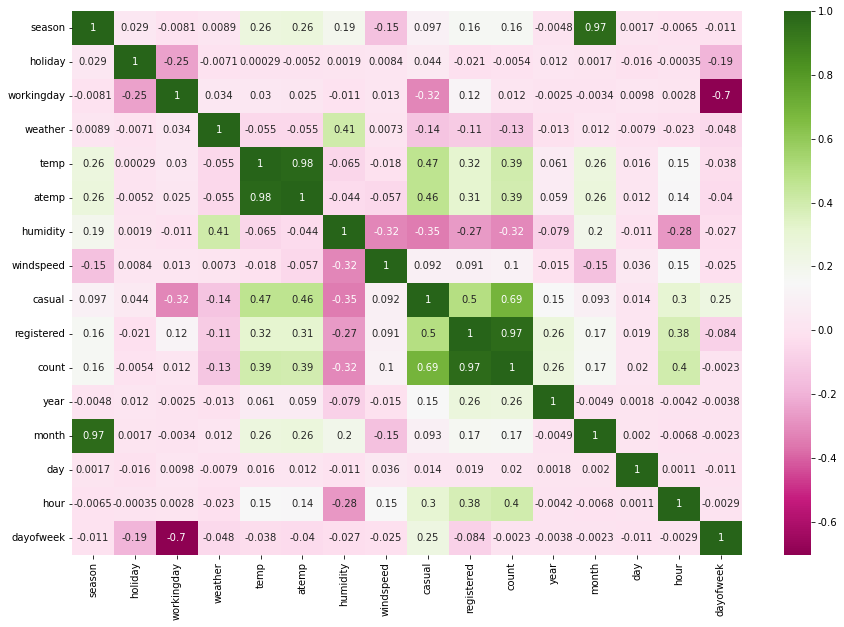

In [13]:
plt.figure(figsize = (15,10))
sns.heatmap(train.corr(), cmap = 'PiYG', annot = True)

#####  Multicollinearity (다중공선성)
1. registered & casual : count
  ● registered, casual은 count와 강한 상관관계를 보임.<br>
  ● Label은 count이므로, registered와 casual은 무시
  
2. temp : atemp
  ● temp와 atemp 또한 강한 상관관계를 보인다.<br>
  ● temp가 atemp보다 객관적인 수치를 가지고 있으므로 atemp를 제거한다.

3. season : month
  ● season과 month도 다중공선성 의심됨.<br>
  ● month보다 season이 더 구별하기 쉬우므로 month 제거
  
  
#####  Correlation
Label인 count와의 상관관계를 봤을 때 hour, temp가 강한 상관관계를 보인다.<br>
종속 변수(count)에 영향을 강하게 미치는 것은 두 독립변수일 것이다.

### Check the VIF value

><Multicollinearity VIF값 확인><br>
>>VIF, 분산 팽창 인수(Variance Inflation Factor)<br><br>
>>VIF : 예측변수들 상관성 有 -> 추정 회계 계수의 산포 크기 측정<br><br>
>>산포가 커질 수록 회귀 모형 신뢰 X

● VIF값 1 근처 : 다중공선성 X, 모형 신뢰 O<br>
● VIF값 10 이상 : 높은 다중공선성, 모형 신뢰X (변수 선택 신중 고려)

● 연속형 변수의 경우에 해당<br>
● 더미변수의 VIF가 3이상이라면 이 경우 다중공선성을 의심해 보아야함


In [14]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
 
   # Calculating VIF
   vif = pd.DataFrame()
   vif["variables"] = X.columns
   vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
 
   return(vif)

In [15]:
#train dataset의 VIF값 보기
#종속변수 제외

calc_vif(train[[i for i in train.describe().columns 
                if i not in ['count', 'registered', 'casual'] ]])

,variables,VIF
0,season,109.474143
1,holiday,1.565805
2,workingday,9.065141
3,weather,7.509535
4,temp,276.791313
5,atemp,315.257259
6,humidity,17.493171
7,windspeed,4.165541
8,year,70.413061
9,month,83.524548


In [16]:
#temp & atemp / season & month : 다중공선성 의심으로, 삭제하여 다시 VIF값 확인

calc_vif(train[[i for i in train.describe().columns 
                if i not in ['count', 'registered', 'casual',
                             'atemp', 'month'] ]])

,variables,VIF
0,season,6.875489
1,holiday,1.544351
2,workingday,8.995568
3,weather,7.498305
4,temp,8.579989
5,humidity,17.314941
6,windspeed,3.997773
7,year,63.699424
8,day,4.338990
9,hour,4.241262


humidity, year의 VIF값이 10 이상인 상태.<br>
heatmap 확인) humidity와 weather 상관성 0.41<br>
그러나 두 독립변수는 둘 중 하나로 대체될 만한 변수가 아님.<br>
따라서 삭제하지 않는다.

year은 해를 거듭할 수록 종속변수의 수 예측에 영향을 끼칠 것으로 보임.<br>
따라서 제외 X

In [17]:
calc_vif(train[[i for i in train.describe().columns 
                if i not in ['count', 'registered', 'casual',
                             'atemp', 'month'] ]])

,variables,VIF
0,season,6.875489
1,holiday,1.544351
2,workingday,8.995568
3,weather,7.498305
4,temp,8.579989
5,humidity,17.314941
6,windspeed,3.997773
7,year,63.699424
8,day,4.338990
9,hour,4.241262


다중공선성이 있어도 해당 독립변수가 유의하다면 삭제 X<br>
(표준오차가 비정상적으로 팽창되었음에도 불구, 유의하다는 의미)

**다중공선성 문제 발생해도 연구자의 의도와 변수의 유의성에 따라 결정해야함

In [18]:
#dayofweek는 요일이므로, holiday와 workingday와 feature 겹침.
#편의성 위해 근무일 여부인 workingday만 남기고 모두 삭제 및 확인.

calc_vif(train[[i for i in train.describe().columns 
                if i not in ['count', 'registered', 'casual',
                             'atemp', 'month',
                            'dayofweek', 'holiday'] ]])

,variables,VIF
0,season,6.869395
1,workingday,3.143376
2,weather,7.497424
3,temp,8.573114
4,humidity,17.256974
5,windspeed,3.991817
6,year,38.317864
7,day,4.337120
8,hour,4.240726


### Barplot

연도/월/일/시간별 대여량 시각화

[Text(0.5, 0, 'Hour'), Text(0.5, 1.0, 'Hourly rental volumn')]

findfont: Font family ['GOTHIC'] not found. Falling back to DejaVu Sans.


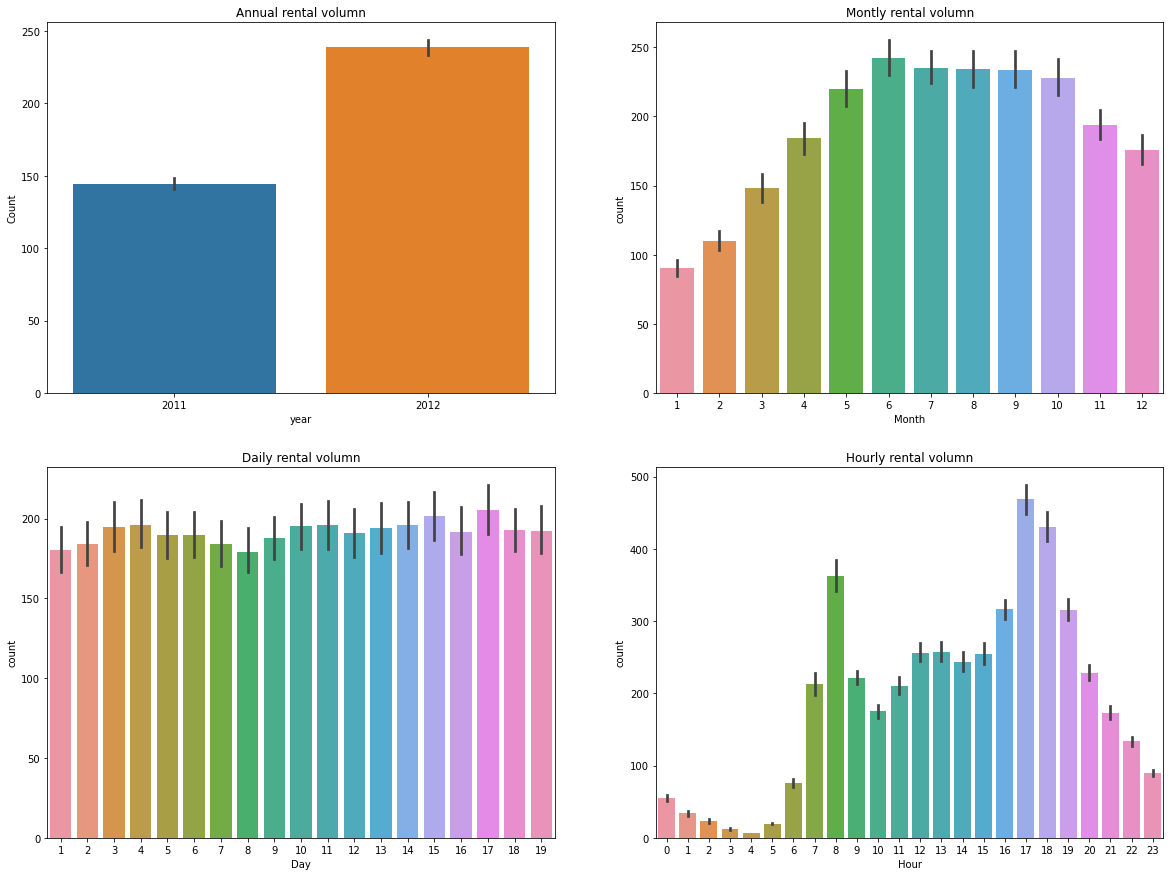

In [19]:
figure, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows = 2, ncols = 2)
figure.set_size_inches(20, 15)

sns.barplot(data = train, x = "year", y = "count", ax = ax1)
sns.barplot(data = train, x = "month", y = "count", ax = ax2)
sns.barplot(data = train, x = "day", y = "count", ax = ax3)
sns.barplot(data = train, x = "hour", y = "count", ax = ax4)

ax1.set(ylabel = 'Count', title = "Annual rental volumn")
ax2.set(xlabel = 'Month', title = "Montly rental volumn")
ax3.set(xlabel = 'Day', title = "Daily rental volumn")
ax4.set(xlabel='Hour', title = "Hourly rental volumn")

##### Annual rental volumn
대여량 : 2011 < 2012<br>
2013년, 2014년 등 해를 거듭할 수록 count 수가 더 많아질 것이다.

##### Montly rental volumn
6~10월이 대여량이 많으며, 6월이 제일 count량이 많다.<br>
1월에 대여량이 가장 적다.

##### Daily rental volumn
train dataset을 이용해 test dataset의 count수를 예측하는 것이므로<br>
우선 train dataset만 시각화를 진행했기 때문에 1 ~ 19일밖에 없다.<br>
(train dataset에는 월마다 1~19일 데이터만 존재한다.)<br>
따라서 day data는 의미가 없다. (수치의 차이도 의미가 없는 듯 하다.)

##### Hourly rental volumn
오전 7시 ~ 오후 8시까지 대여량이 많다.<br>
그 중 출퇴근 시간 대여량이 많음을 추측할 수 있다. (7~9AM / 5~7PM)<bar>
새벽 시간대(12AM ~ 6AM)는 대여량이 현저히 낮다.

### Boxplot

계절별 대여량, 휴일 대여량, 근무일 대여량, 날씨별 대여량 시각화

[Text(0.5, 0, 'Weather'), Text(0.5, 1.0, 'Weather rental volumn')]

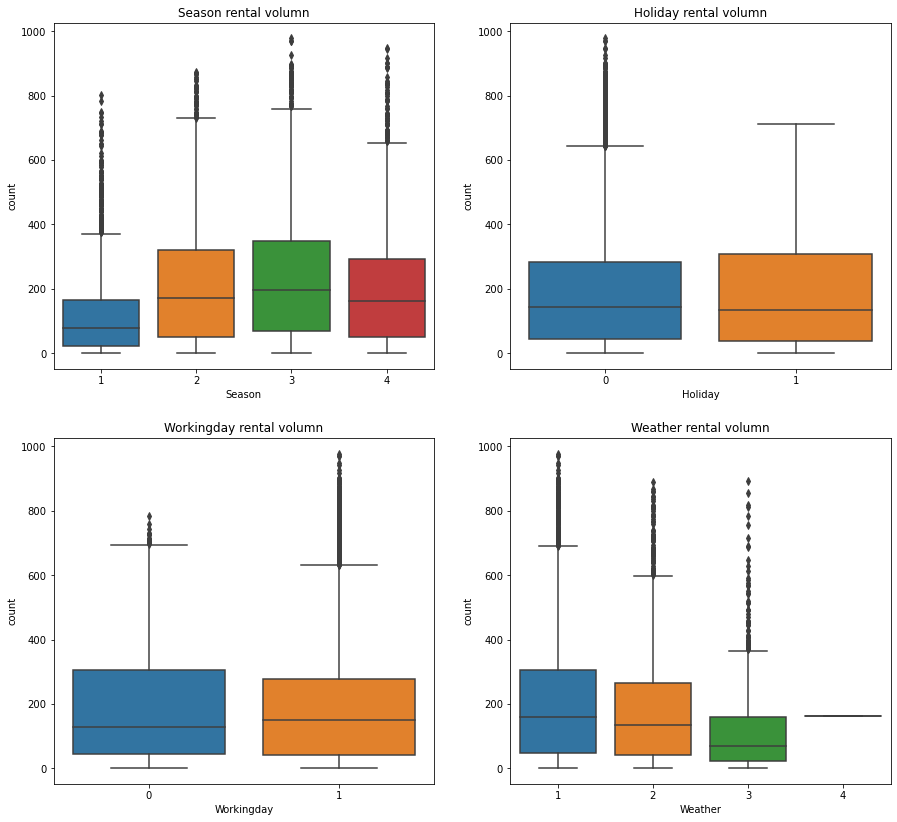

In [20]:
fig, axes = plt.subplots(nrows = 2, ncols = 2)
fig.set_size_inches(15, 14)

sns.boxplot(data = train, y = "count", x = "season", orient = "v", ax = axes[0][0])
sns.boxplot(data = train, y = "count", x = "holiday", orient = "v", ax = axes[0][1])
sns.boxplot(data = train, y = "count", x = "workingday", orient = "v", ax = axes[1][0])
sns.boxplot(data = train, y = "count", x = "weather", orient = "v", ax = axes[1][1])

axes[0][0].set(xlabel = 'Season', title = "Season rental volumn")
axes[0][1].set(xlabel = 'Holiday', title = "Holiday rental volumn")
axes[1][0].set(xlabel = 'Workingday', title = "Workingday rental volumn")
axes[1][1].set(xlabel = 'Weather', title = "Weather rental volumn")

##### Season rental volumn
1 (봄), 2 (여름), 3 (가을), 4 (겨울)<br>
여름과 가을이 대여량 가장 많음

##### Holiday rental volumn
차이는 적으나, 휴일이 조금 더 대여량이 많음

##### Workingday rental volumn
차이는 적으나, 근무일이 조금 더 대여량이 적음<br>

→holiday와 workingday는 중복되는 것 같다.<br>
따라서 holiday와 workingday 중 workingday를 feature로 선택 예정.<br>
(holiday는 매번 바뀌는 공휴일 여부는 포함되어 있지 않음)

##### Weather rental volumn
1 (맑음), 2 (흐림), 3 (눈&비 小), 4 (눈&비 多)<br>
대여량 : 맑음 > 흐림 > 눈&비 小 > 눈&비 多<br>
→눈&비 多가 거의 없다. 

### Pointplot

시간별 근무일, 요일, 계절, 날씨 대여량 시각화

[Text(0.5, 0, 'Season'),
 Text(0, 0.5, 'Count'),
 Text(0.5, 1.0, 'Season rental volumn')]

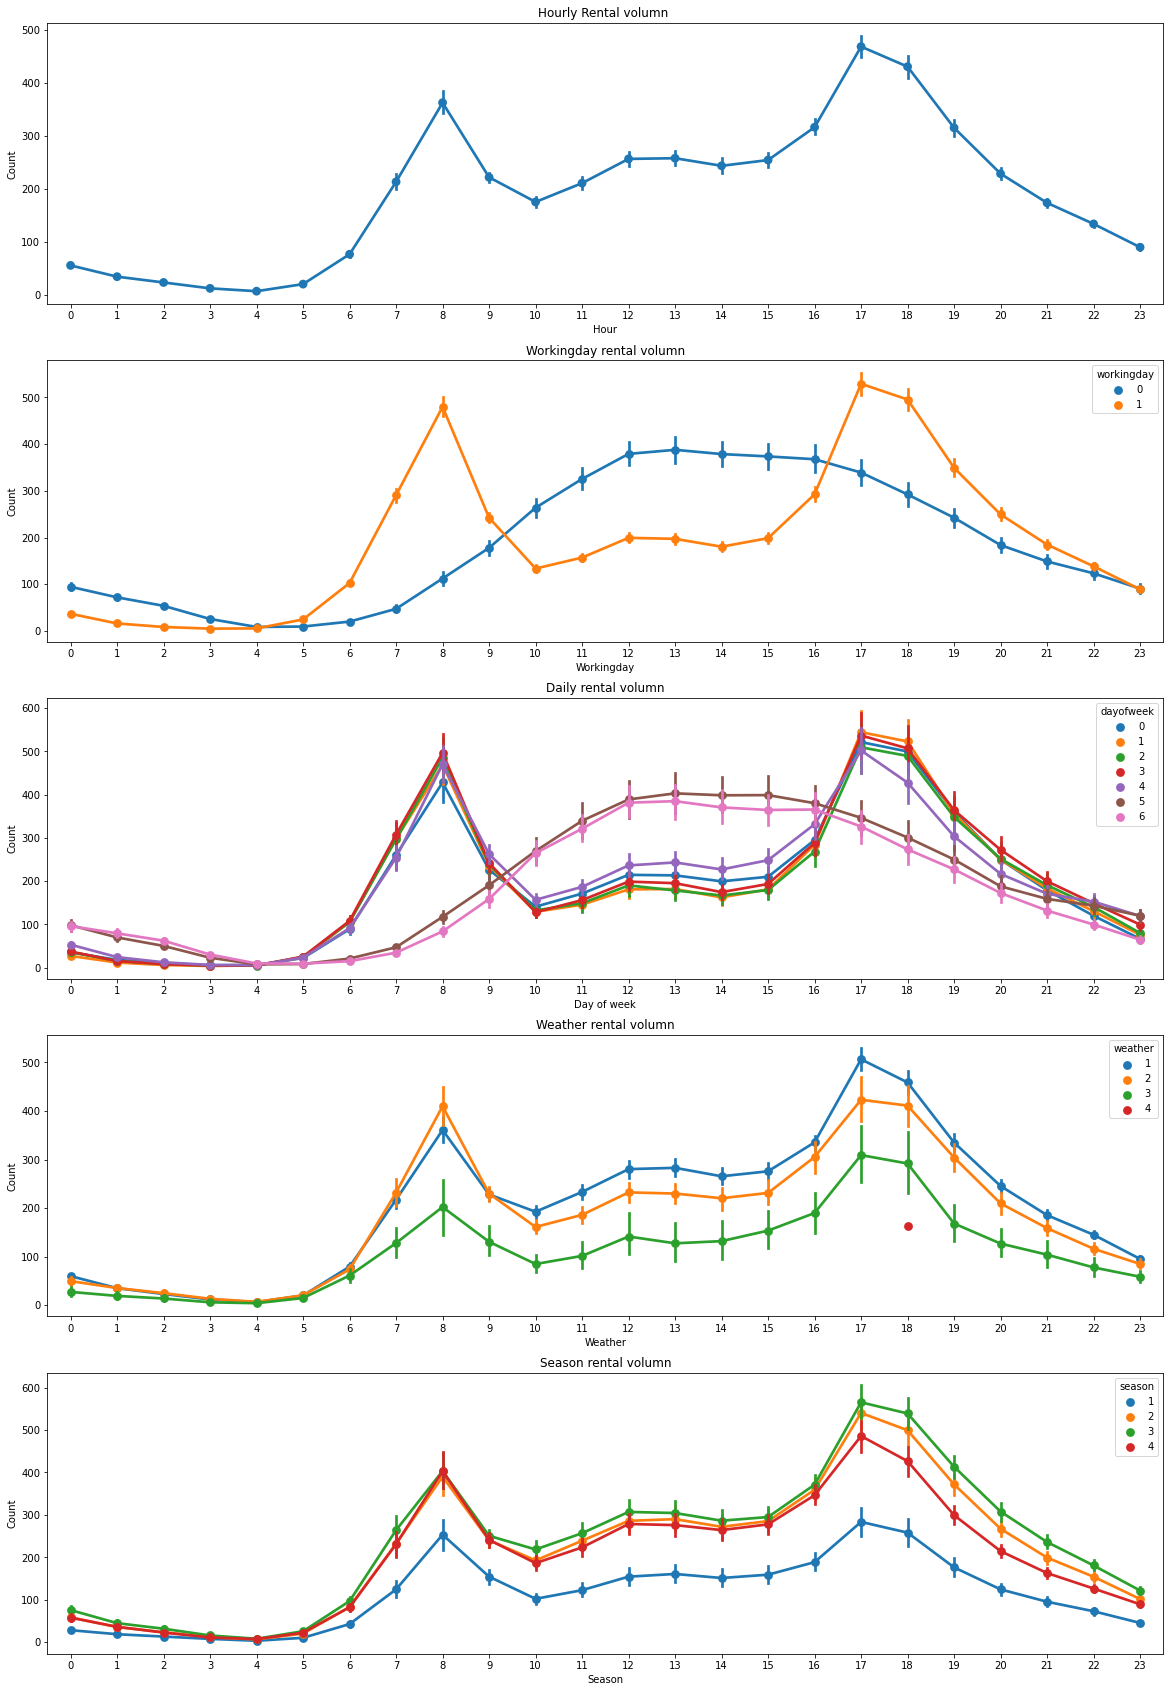

In [21]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows = 5)
fig.set_size_inches(20, 30)

sns.pointplot(data = train, x = "hour", y = "count", ax = ax1)
sns.pointplot(data = train, x = "hour", y = "count", hue = "workingday", ax = ax2)
sns.pointplot(data = train, x = "hour", y = "count", hue = "dayofweek", ax = ax3)
sns.pointplot(data = train, x = "hour", y = "count", hue = "weather", ax = ax4)
sns.pointplot(data = train, x = "hour", y = "count", hue = "season", ax = ax5)

ax1.set(xlabel = 'Hour', ylabel = 'Count', title = "Hourly Rental volumn ")
ax2.set(xlabel = 'Workingday', ylabel = 'Count', title = "Workingday rental volumn")
ax3.set(xlabel = 'Day of week', ylabel = 'Count', title = "Daily rental volumn")
ax4.set(xlabel='Weather', ylabel = 'Count', title = "Weather rental volumn")
ax5.set(xlabel='Season', ylabel = 'Count', title = "Season rental volumn")

##### Workingday rental volumn & Daily rental volumn
0 ~ 4 : 근무일 / 5 ~ 6 : 휴일<br>
근무일 : 출퇴근 시간 대여량 多 (7 ~ 9AM, 4 ~ 7PM)<br>
휴일 : 늦은 오전 ~ 늦은 오후 대여량 多 (10AM ~ 7PM)

##### Weather rental volumn
맑은 날 & 흐린 날 대여량 多<br>
눈&비 小 대여량 적지만 있음<br>
(눈&비 多 value값 삭제)

##### Season rental volumn
여름, 가을 대여량 多<br>
봄 대여량 小

### Regplot (산점도)

온도, 습도, 풍속 시각화

<AxesSubplot:xlabel='humidity', ylabel='count'>

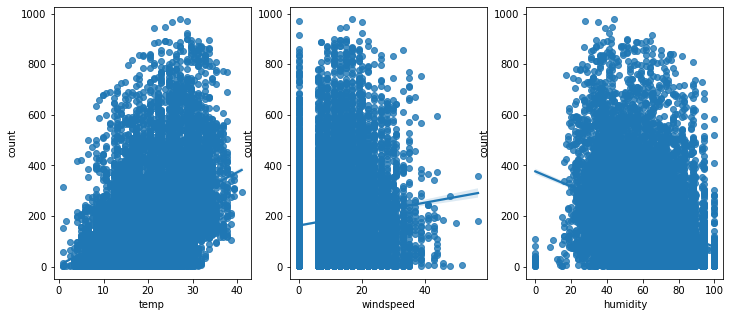

In [22]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols = 3)
fig.set_size_inches(12, 5)

sns.regplot(x = "temp", y = "count", data = train, ax = ax1)
sns.regplot(x = "windspeed", y = "count", data = train, ax = ax2)
sns.regplot(x = "humidity", y = "count", data = train, ax = ax3)

##### temp
너무 추운 날과 너무 더운 날 제외한 중간 온도에 대여량 多<br>
count와 정비례

##### windspeed
count와 미미한 정비례, 40m/s 이상이 되면 대여량 거의 없음.<br>

0값에 몰려있다. → 결측치로 보고 feature engineering을 해줘야 할까?<br>

a. 0값 = 결측치 : feature engineering (0값 평균 대체)<br>
b. 0값 = 결측치 : feature engineering (0값 예측)<br>
c. 0값 그대로 두기<br>
d. feature 삭제
<br><br>
결론)<br>
a. 0값을 결측치로 보고 feature engineering을 통해 0값 예측

##### humidity
count와 반비례, 90% 이상이 되면 대여량 감소.

# Feature Engineering

### Visualize the 'count' distribution plot

<AxesSubplot:xlabel='count', ylabel='Density'>

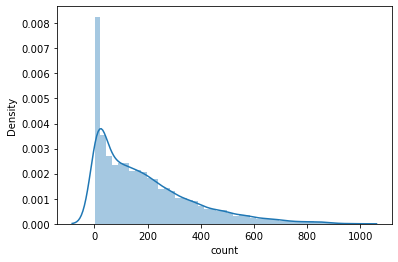

In [23]:
sns.distplot(train['count'])

##### count의 skewness 확인
● 왜도 값 = + : data 평균이 정규 분포보다 왼쪽으로 치우쳐져 있음<br>
● 왜도 값 = - : data 평균이 정규 분포보다 오른쪽으로 치우져져 있음<br>
→ 보통 -2 ~ 2 정도의 작은 치우침은 왜도가 크지 않다고 판단.<br>

> 정규화 : log 변환, 제곱, 제곱근 변환 
>> data의 특성에 대한 충분한 이해 필요 : 시험 점수, 시간 관련 data는 왜도 클 가능성 ↑<br><br>
>> 첨도가 크면 outlier 많은 경우 多

In [24]:
train['count'].skew()

1.2420662117180776

종속변수 count → 정규화 필요.<br>

제곱근 변환(Square Root Transform) 사용

0.25764327133235915


<AxesSubplot:xlabel='count', ylabel='Density'>

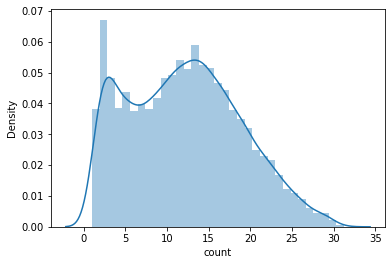

In [25]:
df_root = np.sqrt(train['count'])
#루트 변환

print(df_root.skew())
#skewness(왜도) 확인

sns.distplot(df_root)

### Feature Categorization

In [26]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  year        10886 non-null  int64         
 13  month       10886 non-null  int64         
 14  day         10886 non-null  int64         
 15  hour        10886 non-null  int64         
 16  dayofweek   10886 non-

train의 data의 type을 살펴본 결과, <br>
범주형 data가 Numerical type으로 지정되어 있다.

범주형 data는 1과 4로 지정해도 둘이 다르다는 것일 뿐, <br>
4가 1보다 더 큰 것이 아니므로<br>
categorical feature로 지정해줘야 한다.

In [27]:
#Numerical type to Categorical type

categorical_feature_names = ["season", "holiday", "workingday", "weather",
                            "month", "day", "year", "hour", "dayofweek"]

for var in categorical_feature_names:
    train[var] = train[var].astype("category")
    test[var] = test[var].astype("category")

In [28]:
train.dtypes

datetime      datetime64[ns]
season              category
holiday             category
workingday          category
weather             category
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
year                category
month               category
day                 category
hour                category
dayofweek           category
dtype: object

In [29]:
test.dtypes

datetime      datetime64[ns]
season              category
holiday             category
workingday          category
weather             category
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
year                category
month               category
day                 category
hour                category
dayofweek           category
dtype: object

### Outlier (weather)

In [30]:
#unique를 이용하여 weather column에 있는 data들의 종류 확인

train['weather'].unique()

[1, 2, 3, 4]
Categories (4, int64): [1, 2, 3, 4]

In [31]:
#value_counts를 이용하여 weather col 중 종류마다 data 개수 세기

train['weather'].value_counts()

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

눈&비 多(4) data는 총 1개이므로, outlier에 해당한다.

눈&비 多 날씨에 자전거를 탄 사람은 모종의 급한 일이 있기 때문일 것이다.<br>
보편적인 이유가 되지 않으므로 해당 outlier를 제거한다.

In [32]:
#weather column 중 날씨 4 값 제거

train = train[train.weather != 4 ]
train['weather'].value_counts()

1    7192
2    2834
3     859
4       0
Name: weather, dtype: int64

### Remove Outliers 

1)<br>
각각 count 값 - count 평균 -> 절대값 씌우기 = a값이라 가정,<br>
count의 표준편차 * 3한 값 >= a<br>
a값 trainWithoutOutliers에 넣기

2)<br>
std(standard deviation) : 차이값의 제곱의 평균<br>
표준편차 * 3 : 3시그마 규칙(three-sigma rule)<br>
3시그마 규칙 : 평균에서 양쪽으로 3표준편차 범위에 <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;거의 모든 값들(99.7%)이 들어간다는 것을 의미.<br>
거의 모든 데이터인 99.7%만 사용하고 나머지 걸러냄

3)<br>
0에 몰려있거나 너무 끝에 있는 데이터 : 제거

In [33]:
trainWithoutOutliers = train[np.abs(train["count"] - train["count"].mean()) <= (3*train["count"].std())]

print(train.shape)
print(trainWithoutOutliers.shape)

# result : 10885개 -> 10738개 데이터

(10885, 17)
(10738, 17)


((array([-3.82817384, -3.60399556, -3.48096514, ...,  3.48096514,
          3.60399556,  3.82817384]),
  array([ 1.        ,  1.        ,  1.        , ..., 27.05549852,
         27.07397274, 27.09243437])),
 (6.3843810851396805, 11.880279856134166, 0.9863928756780425))

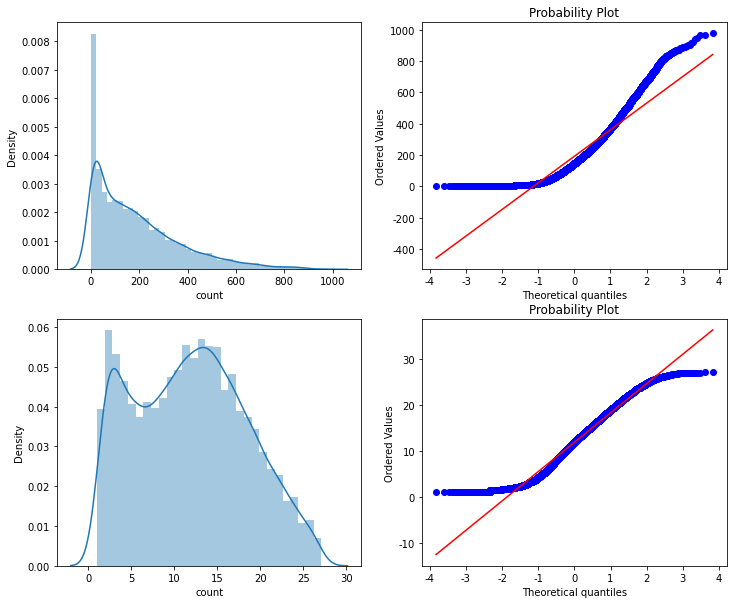

In [34]:
# 원 데이터 & 이상치 제거 데이터 비교 (sqrt)
# count값의 데이터 분포도 파악

from scipy import stats

figure, axes = plt.subplots(ncols = 2, nrows = 2)
figure.set_size_inches(12, 10)

sns.distplot(train["count"], ax = axes[0][0])
stats.probplot(train["count"], dist = 'norm', fit = True, plot = axes[0][1])
sns.distplot(np.sqrt(trainWithoutOutliers["count"]), ax = axes[1][0])
stats.probplot(np.sqrt(trainWithoutOutliers["count"]), dist = 'norm', fit = True, plot = axes[1][1])

Original data : 0에 몰려있음
    
Remove Outliers data : 아웃라이어 제거하고 정규분포 그림 -> <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;여전치 치우쳐져 있지만 이전 그래프보다는 <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;좀 더 자세히 그래프를 표현하고 있음

기계학습 -> 종속변수가 normal 이어야 하기에 정규분포를 갖는 것이 바람직함.

### Modeling the zero value prediction of the 'windspeed' feature

0값을 randomforest 모델을 이용하여 예측

In [35]:
#windspeed의 전체 개수 구하기

train['windspeed'].count()

10885

In [36]:
#windspeed 중 0값 개수 구하기

len(train.loc[train['windspeed'] == 0])

1313

In [37]:
#windspeed row data 중 0값이 차지하는 비율

print ('%.2f%%' % (1313.0 / 10885.0 * 100.0))

12.06%


<AxesSubplot:title={'center':'train windspeed'}, xlabel='windspeed', ylabel='count'>

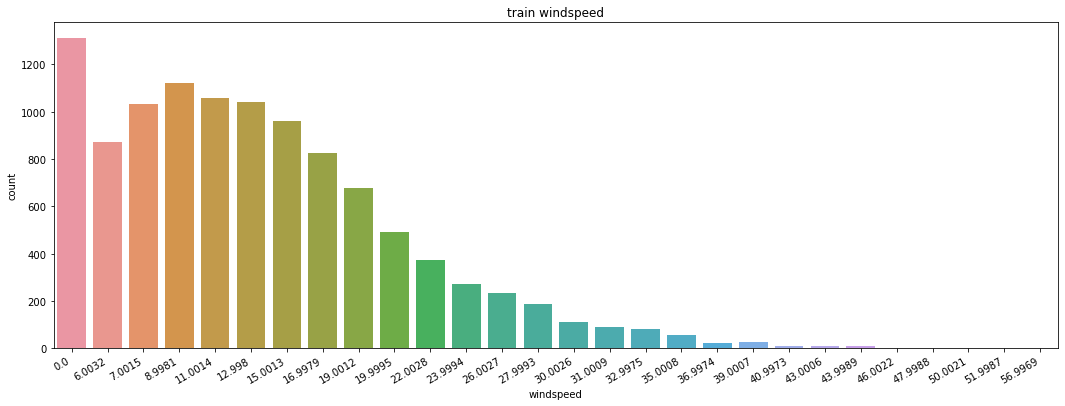

In [38]:
# 0값 모델링 전 train col의 windspeed 분포도 시각화

fig, ax1 = plt.subplots()
fig.set_size_inches(18,6)

plt.sca(ax1)
plt.xticks(rotation = 30, ha = 'right')
ax1.set(ylabel = 'Count',title = "train windspeed")

sns.countplot(data = train, x = "windspeed", ax = ax1)

In [39]:
# 풍속이 0인것과 아닌 것의 세트를 나누어 준다.

trainWind0 = train.loc[train['windspeed'] == 0]
trainWindNot0 = train.loc[train['windspeed'] != 0]

print(trainWind0.shape)
print(trainWindNot0.shape)

(1313, 17)
(9572, 17)


In [40]:
# 0값 예측 모델 생성

from sklearn.ensemble import RandomForestClassifier

def predict_windspeed(data):
    
    # 풍속이 0인것과 아닌 것으로 나누기
    dataWind0 = data.loc[data['windspeed'] == 0]
    dataWindNot0 = data.loc[data['windspeed'] != 0]
    
    # 풍속 예측할 feature 선택
    wCol = ["season", "weather", "humidity", "hour", "temp", "year"]

    # 풍속 != 0 data type → string 변환
    dataWindNot0["windspeed"] = dataWindNot0["windspeed"].astype("str")

    # 랜덤포레스트 모델 사용
    rfModel_wind = RandomForestClassifier()

    # wCol 이용하여 windspeed 학습
    rfModel_wind.fit(dataWindNot0[wCol], dataWindNot0["windspeed"])

    # 풍속 = 0값 예측
    wind0Values = rfModel_wind.predict(X = dataWind0[wCol])

    # 값 예측 완료 후 비교 위해 
    # 예측값을 넣어 줄 data frame 생성
    predictWind0 = dataWind0
    predictWindNot0 = dataWindNot0

    # 풍속 = 0 → 예측값 넣기
    predictWind0["windspeed"] = wind0Values

    # dataWindNot0, dataWind0 합치기
    data = predictWindNot0.append(predictWind0)

    # 풍속 datatype = float 지정
    data["windspeed"] = data["windspeed"].astype("float")

    data.reset_index(inplace = True)
    data.drop('index', inplace = True, axis = 1)
    
    return data

In [41]:
# 0값을 조정한다.
train = predict_windspeed(train)

<AxesSubplot:title={'center':'train windspeed'}, xlabel='windspeed', ylabel='count'>

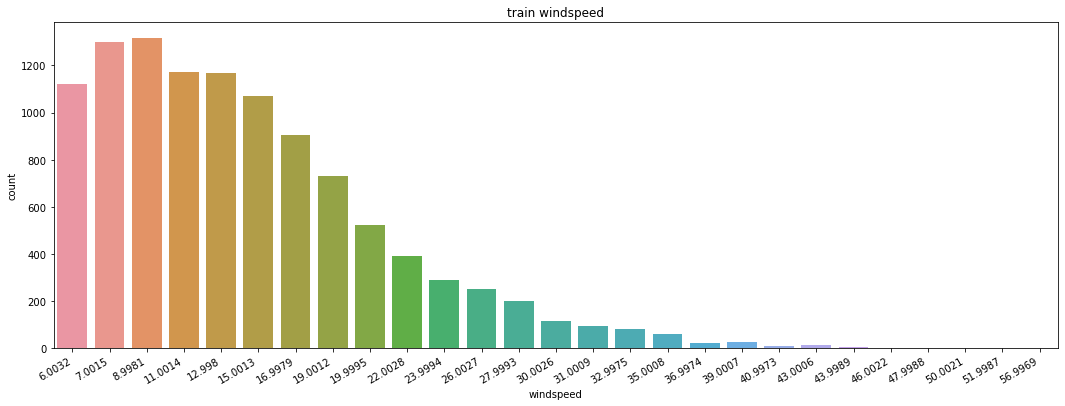

In [42]:
# 0값 모델링 후 windspeed 분포도 시각화

fig, ax1 = plt.subplots()
fig.set_size_inches(18,6)

plt.sca(ax1)
plt.xticks(rotation = 30, ha = 'right')
ax1.set(ylabel = 'Count',title = "train windspeed")

sns.countplot(data = train, x = "windspeed", ax = ax1)

##### Feature drop (unuseful feature)

datetime : 연,월,일,시간,요일로 분할하였으니 원래 col은 필요x<br>
holiday : workingday & dayofweek와 겹치므로 제외<br>
atemp : temp와 다중공선성, 비교적 주관적인 지표이므로 제외<br>
month : season과 겹치므로 제외<br>
day : 크게 영향 없음, workingday & dayofweek & holiday와 겹치므로 제외<br>
dayofweek : holiday & workingday와 겹치므로 제외

In [43]:
drop_features = ['datetime', 'holiday', 'atemp', 'month',
                'day', 'dayofweek', 'registered', 'casual']

train = train.drop(drop_features, axis = 1)

In [44]:
train.dtypes

season        category
workingday    category
weather       category
temp           float64
humidity         int64
windspeed      float64
count            int64
year          category
hour          category
dtype: object

In [45]:
drop_test_features = ['datetime', 'holiday', 'atemp', 'month',
                      'day', 'dayofweek']
test = test.drop(drop_test_features, axis = 1)

In [46]:
train.dtypes

season        category
workingday    category
weather       category
temp           float64
humidity         int64
windspeed      float64
count            int64
year          category
hour          category
dtype: object

In [47]:
test.dtypes

season        category
workingday    category
weather       category
temp           float64
humidity         int64
windspeed      float64
year          category
hour          category
dtype: object

### Hot Encoding

season, workingday, weather, year, hour은 category type.<br>
모델링을 위해 더미 변수 생성

year, hour은 수치의 형태지만 2012년이 2011년보다 큰 수치로 판단되는 것은<br>
아니므로 category로 type 지정.

In [48]:
#season 더미변수 생성 (train & test)

season_encoded = pd.get_dummies(train['season'], prefix = 'season')
train = pd.concat((train,season_encoded), axis = 1)
train = train.drop(columns = 'season')

season_encoded = pd.get_dummies(test['season'], prefix = 'season')
test = pd.concat((test,season_encoded), axis = 1)
test = test.drop(columns = 'season')

In [49]:
#workingday 더미변수 생성 (train & test)

workingday_encoded = pd.get_dummies(train['workingday'], prefix = 'workingday')
train = pd.concat((train,workingday_encoded), axis = 1)
train = train.drop(columns = 'workingday')

workingday_encoded = pd.get_dummies(test['workingday'], prefix = 'workingday')
test = pd.concat((test,workingday_encoded), axis = 1)
test = test.drop(columns = 'workingday')

In [50]:
#weather 더미변수 생성 (train & test)

weather_encoded = pd.get_dummies(train['weather'], prefix = 'weather')
train = pd.concat((train,weather_encoded), axis = 1)
train = train.drop(columns = 'weather')

weather_encoded = pd.get_dummies(test['weather'], prefix = 'weather')
test = pd.concat((test,weather_encoded), axis = 1)
test = test.drop(columns = 'weather')

In [51]:
#year 더미변수 생성 (train & test)

year_encoded = pd.get_dummies(train['year'], prefix = 'year')
train = pd.concat((train,year_encoded), axis = 1)
train = train.drop(columns = 'year')

year_encoded = pd.get_dummies(test['year'], prefix = 'year')
test = pd.concat((test,year_encoded), axis = 1)
test = test.drop(columns = 'year')

In [52]:
#hour 더미변수 생성 (train & test)

hour_encoded = pd.get_dummies(train['hour'], prefix = 'hour')
train = pd.concat((train,hour_encoded), axis = 1)
train = train.drop(columns = 'hour')

hour_encoded = pd.get_dummies(test['hour'], prefix = 'hour')
test = pd.concat((test,hour_encoded), axis = 1)
test = test.drop(columns = 'hour')

In [53]:
train.dtypes

temp            float64
humidity          int64
windspeed       float64
count             int64
season_1          uint8
season_2          uint8
season_3          uint8
season_4          uint8
workingday_0      uint8
workingday_1      uint8
weather_1         uint8
weather_2         uint8
weather_3         uint8
weather_4         uint8
year_2011         uint8
year_2012         uint8
hour_0            uint8
hour_1            uint8
hour_2            uint8
hour_3            uint8
hour_4            uint8
hour_5            uint8
hour_6            uint8
hour_7            uint8
hour_8            uint8
hour_9            uint8
hour_10           uint8
hour_11           uint8
hour_12           uint8
hour_13           uint8
hour_14           uint8
hour_15           uint8
hour_16           uint8
hour_17           uint8
hour_18           uint8
hour_19           uint8
hour_20           uint8
hour_21           uint8
hour_22           uint8
hour_23           uint8
dtype: object

In [54]:
test.dtypes

temp            float64
humidity          int64
windspeed       float64
season_1          uint8
season_2          uint8
season_3          uint8
season_4          uint8
workingday_0      uint8
workingday_1      uint8
weather_1         uint8
weather_2         uint8
weather_3         uint8
weather_4         uint8
year_2011         uint8
year_2012         uint8
hour_0            uint8
hour_1            uint8
hour_2            uint8
hour_3            uint8
hour_4            uint8
hour_5            uint8
hour_6            uint8
hour_7            uint8
hour_8            uint8
hour_9            uint8
hour_10           uint8
hour_11           uint8
hour_12           uint8
hour_13           uint8
hour_14           uint8
hour_15           uint8
hour_16           uint8
hour_17           uint8
hour_18           uint8
hour_19           uint8
hour_20           uint8
hour_21           uint8
hour_22           uint8
hour_23           uint8
dtype: object

# Feature Selection

train은 test에는 없는 label col(count)가 존재하므로<br>
모델링 시 feature의 개수가 match되지 않는다.<br>
따라서 mismatch 되지 않도록 feature를 지정해 줄 필요가 있다.

In [55]:
#train dataset 전용

features_name = ["temp", "humidity", "windspeed",
                 "season_1", "season_2", "season_3", "season_4",
                 "workingday_0", "workingday_1",
                 "weather_1", "weather_2", "weather_3", "weather_4",
                "year_2011", "year_2012", "hour_0", "hour_1", "hour_2",
                 "hour_3", "hour_4", "hour_5", "hour_6", "hour_7",
                 "hour_8", "hour_9", "hour_10", "hour_11", "hour_12",
                 "hour_13", "hour_14", "hour_15", "hour_16", "hour_17",
                "hour_18", "hour_19", "hour_20", "hour_21",
                 "hour_22", "hour_23"]

features_name

['temp',
 'humidity',
 'windspeed',
 'season_1',
 'season_2',
 'season_3',
 'season_4',
 'workingday_0',
 'workingday_1',
 'weather_1',
 'weather_2',
 'weather_3',
 'weather_4',
 'year_2011',
 'year_2012',
 'hour_0',
 'hour_1',
 'hour_2',
 'hour_3',
 'hour_4',
 'hour_5',
 'hour_6',
 'hour_7',
 'hour_8',
 'hour_9',
 'hour_10',
 'hour_11',
 'hour_12',
 'hour_13',
 'hour_14',
 'hour_15',
 'hour_16',
 'hour_17',
 'hour_18',
 'hour_19',
 'hour_20',
 'hour_21',
 'hour_22',
 'hour_23']

# Split Train, Test dataset

In [56]:
#X_train 분리

X_train = train[features_name]

print(X_train.shape)
X_train.head()

(10885, 39)


,temp,humidity,windspeed,season_1,season_2,season_3,season_4,workingday_0,workingday_1,weather_1,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
0,9.84,75,6.0032,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,15.58,76,16.9979,1,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,14.76,81,19.0012,1,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,17.22,77,19.0012,1,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,18.86,72,19.9995,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [57]:
#X_test 분리

X_test = test

print(X_test.shape)
X_test.head()

(6493, 39)


,temp,humidity,windspeed,season_1,season_2,season_3,season_4,workingday_0,workingday_1,weather_1,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
0,10.66,56,26.0027,1,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,10.66,56,0.0000,1,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,10.66,56,0.0000,1,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
3,10.66,56,11.0014,1,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
4,10.66,56,11.0014,1,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0


In [58]:
#label col 지정

label = "count"

y_train = train[label]

print(y_train.shape)
y_train.head()

(10885,)


0     1
1    36
2    56
3    84
4    94
Name: count, dtype: int64

# Score

bike sharing demand 경진대회 : RMSLE 방법 사용

RMSLE<br>
패널티 : 과소평가 > 과대평가 된 항목<br>
정밀도 ↑ = 값 ↓ ((Error)^ -> Mean ->Root)<br>
0에 가까운 값 : 정밀도 ↑

In [59]:
#성능 지표 생성 (RMSLE)

from sklearn.metrics import make_scorer

def RMSLE(predicted_values, actual_values):
    predicted_values = np.array(predicted_values)
    actual_values = np.array(actual_values)
    
    log_predict = np.log(predicted_values + 1)
    log_actual = np.log(actual_values + 1)
    
    difference = log_predict - log_actual
    difference = np.square(difference)
    
    mean_difference = difference.mean()
    
    score = np.sqrt(mean_difference)
    
    return score

RMSLE_scorer = make_scorer(RMSLE)
RMSLE_scorer

make_scorer(RMSLE)

# Modeling

**1. Model**<br>
-Linear Regression<br>
-Ridge<br>
-Lasso<br>
-ElasticNet<br>
-RandomForest<br>
-GradientBoost<br>
-XGBoost (Extreme Gradient Boosting)<br>
-Catboost<br>
-LightGBM

**2. Cross Validation (교차검증)**<br>
-GridSearchCV (모델 성능향상 기법 / 사이킷런)<br>
사용자가 직접 모델의 하이퍼 파라미터 값을 리스트로 입력 시<br>
값에 대한 경우의 수마다 예측 성능을 측정 평가하여 비교,<br>
최적의 하이퍼 파라미터 값 찾는 과정<br>

= 교차검증 + 하이퍼 파라미터 튜닝<br>

시간이 오래걸림

### Linear Regression Model

회귀계수들에 제약을 가해 일반화(generalization) 성능 높이는 기법<br>

종속변수(y)의 실제값과 모델의 예측값 사이의 평균제곱오차(Mean Square Error)<br>를 최소화하는 회귀계수들의 집합<br>

규제 회귀 모델 : 릿지, 라쏘, 엘라스틱넷<br>
1.다중공선성<br>
2.X가 데이터 개수에 비해 너무 多<br>
3.오버피팅 의심 경우


================Evalution Matrix=========================

RMSLE :  0.5616816006265033

================Prediction Line Gragh=========================



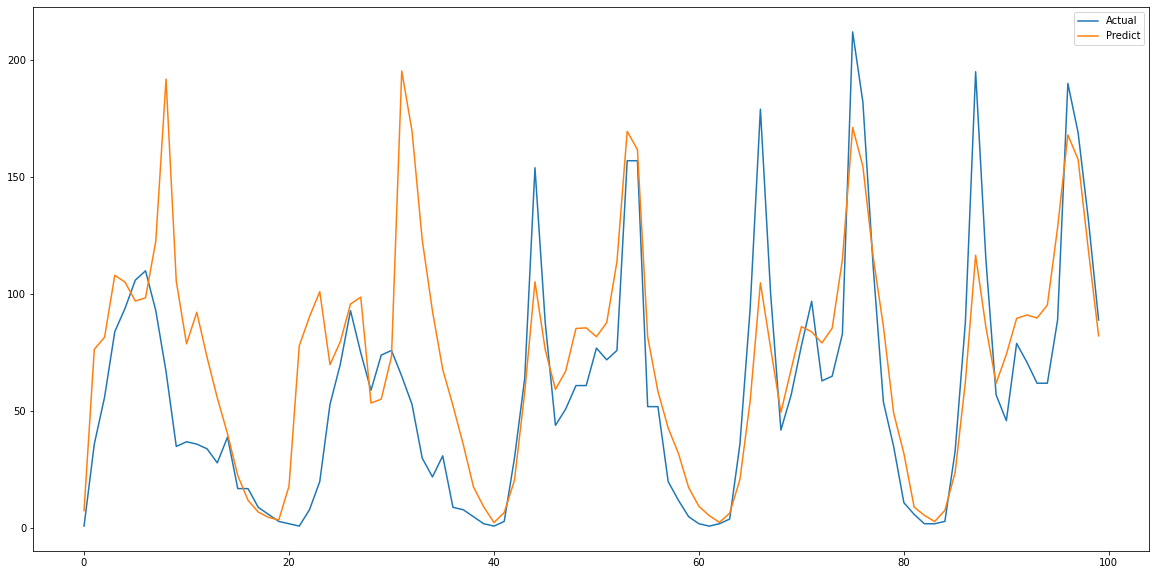

In [60]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import warnings
pd.options.mode.chained_assignment = None
warnings.filterwarnings('ignore', category=DeprecationWarning)

# 선형회귀 모델을 초기화
linear_model = LinearRegression()

# 모델 학습
y_train_log = np.log1p(y_train)
linear_model.fit(X_train, y_train_log)

# 예측하고 정확도를 평가한다.
preds = linear_model.predict(X_train)
print('\n================Evalution Matrix=========================\n')
print("RMSLE : ",
     RMSLE(np.exp(y_train_log), np.exp(preds)))

print('\n================Prediction Line Gragh=========================\n')
fig, axes = plt.subplots(1, 1, figsize = (20, 10))
plt.plot(y_train[:100], label = 'Actual')
plt.plot(np.exp(preds)[:100], label = 'Predict')
plt.legend() 
plt.show()

### Ridge

평균제곱오차를 최소화하면서 회귀계수 벡터 β의 L2 norm을 제한하는 기법<br>

평균제곱오차뿐 아니라 β의 L2 norm 또한 최소화하는 것이 릿지 회귀의 목적<br>

변수간 상관관계가 높아도 좋은 성능<br>

L2 규제는 L1 규제와 비슷한 양상을 보이나, <br> 
규제가 강해져 과소 적합이 심해지지 않는 특성을 가지고 있다.  <br>
그래서 L2 규제를 많이 사용한다. 


================Best Paramiter=========================

{'alpha': 0.01, 'max_iter': 3000}

================Evalution Matrix=========================

RMSLE :  0.5616812137256105

================Prediction Line Gragh=========================



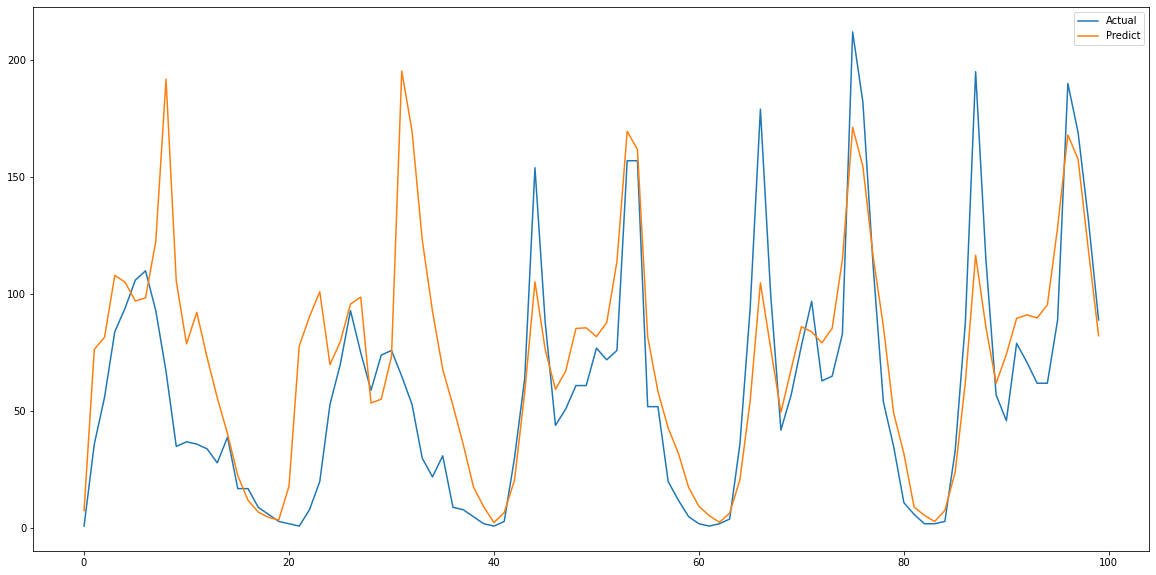

In [61]:
ridge_model = Ridge()
ridge_params_ = {'max_iter':[3000],
                 'alpha':[0.01, 0.1, 1, 2, 3, 4, 10,
                          30, 100, 200, 300, 400, 800, 900, 1000]}
#alpha : 클 수록 규제가 많이 들어가며, 복잡해진다.
#커질수록 계수의 크기가 줄어들게 되며, 영향을 끼치는 변수가 줄어들게 됨.
#alpha = 0 -> Linear 모델과 똑같아짐

#alpha 크기를 늘릴 수록 (10, 100, 1000) 모델 성능이 떨어짐.

rmsle_scorer = metrics.make_scorer(RMSLE, greater_is_better = False)
grid_ridge_model = GridSearchCV(ridge_model,
                          ridge_params_,
                          scoring = rmsle_scorer,
                          cv = 10)
#cv : 모델을 10번 교차검증

y_train_log = np.log1p(y_train)
grid_ridge_model.fit(X_train, y_train_log)
preds = grid_ridge_model.predict(X_train)
print('\n================Best Paramiter=========================\n')
print (grid_ridge_model.best_params_)
print('\n================Evalution Matrix=========================\n')
print ("RMSLE : ", 
       RMSLE(np.exp(y_train_log), np.exp(preds)))

print('\n================Prediction Line Gragh=========================\n')
fig, axes = plt.subplots(1, 1, figsize = (20, 10))
plt.plot(y_train[:100], label = 'Actual')
plt.plot(np.exp(preds)[:100], label = 'Predict')
plt.legend()
plt.show()

### Lasso

예측에 중요하지 않은 변수의 회귀계수를 감소시킴으로써<br>
변수선택(Feature Selection)하는 효과를 냄<br>

L1  norm을 제약<br>
변수간 상관관계가 높으면 성능↓<br>

L1규제는 규제가 커질 수록 훈련 세트의 손실과 검증 세트의 <br>
손실이 커지고(과소적합화됨) 규제가 커질 수록 가중치 값이 "0"에 가까워진다.


================Best Paramiter=========================

{'alpha': 0.001, 'max_iter': 3000}

================Evalution Matrix=========================

RMSLE :  0.5621955163993826

================Prediction Line Gragh=========================



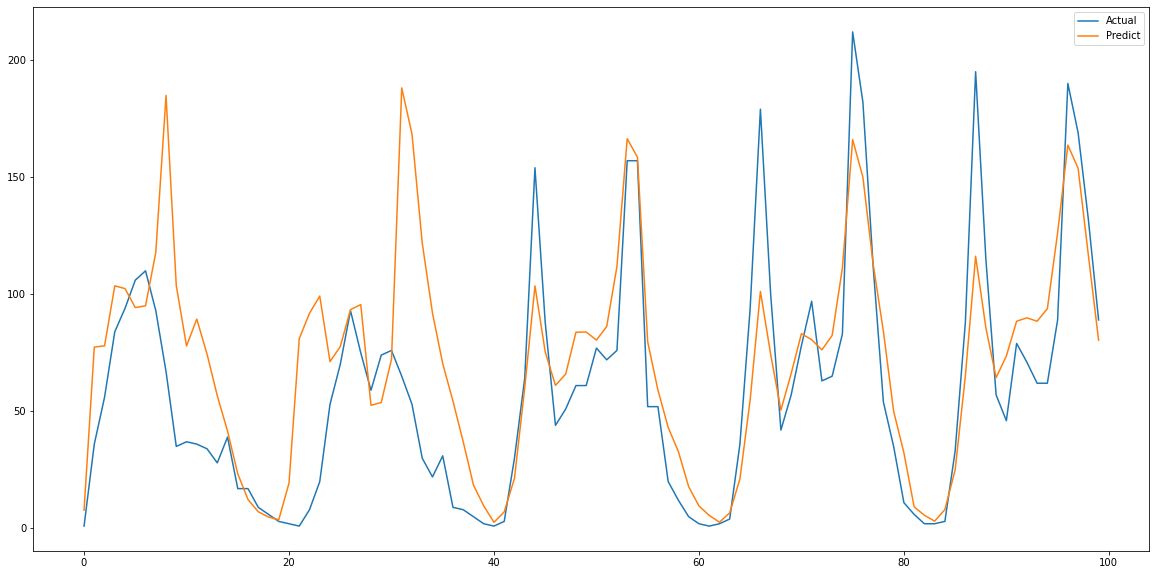

In [62]:
lasso_model = Lasso()

alpha  = 1/np.array([0.1, 1, 2, 3, 4, 10, 30, 100, 200, 300, 400, 800, 900, 1000])
lasso_params_ = {'max_iter':[3000], 'alpha':alpha}

grid_lasso_model = GridSearchCV(lasso_model,
                          lasso_params_,
                          scoring = rmsle_scorer,
                          cv = 5)

y_train_log = np.log1p(y_train)
grid_lasso_model.fit(X_train, y_train_log)
preds = grid_lasso_model.predict(X_train)
print('\n================Best Paramiter=========================\n')
print (grid_lasso_model.best_params_)
print('\n================Evalution Matrix=========================\n')
print ("RMSLE : ", 
       RMSLE(np.exp(y_train_log), np.exp(preds)))

print('\n================Prediction Line Gragh=========================\n')
fig, axes = plt.subplots(1, 1, figsize = (20, 10))
plt.plot(y_train[:100], label = 'Actual')
plt.plot(np.exp(preds)[:100], label = 'Predict')
plt.legend()
plt.show()

### ElasticNet

제약식에 L1,L2 norm 모두 쓰는 기법<br>
변수간 상관관계를 반영한 정규화



================Best Paramiter=========================

{'alpha': 1e-15, 'l1_ratio': 0.1}

================Evalution Matrix=========================

RMSLE :  0.5616814600182943

================Prediction Line Gragh=========================



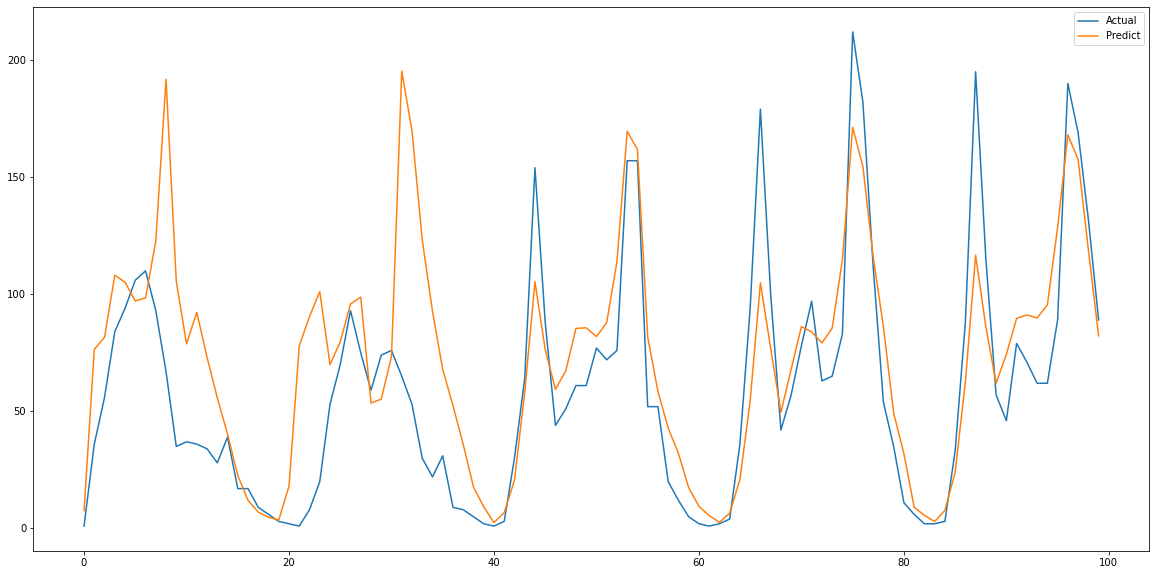

In [63]:
from sklearn.linear_model import ElasticNet
elastic_model = ElasticNet()

elastic_params_ = {'alpha': [1e-15, 1e-13, 1e-10, 1e-8, 1e-5, 1e-4, 1e-3, 1e-2,
                             1e-1, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60, 100],
                   'l1_ratio':[0.1, 0.2, 0.3, 0.4, 0.5]}

grid_elastic_model = GridSearchCV(elastic_model,
                          elastic_params_,
                          scoring = rmsle_scorer,
                          cv = 5)

y_train_log = np.log1p(y_train)
grid_elastic_model.fit(X_train, y_train_log)
preds = grid_elastic_model.predict(X_train)
print('\n================Best Paramiter=========================\n')
print (grid_elastic_model.best_params_)
print('\n================Evalution Matrix=========================\n')
print ("RMSLE : ", 
       RMSLE(np.exp(y_train_log), np.exp(preds)))

print('\n================Prediction Line Gragh=========================\n')
fig, axes = plt.subplots(1, 1, figsize = (20, 10))
plt.plot(y_train[:100], label = 'Actual')
plt.plot(np.exp(preds)[:100], label = 'Predict')
plt.legend()
plt.show()

### RandomForest

앙상블 방법론 : 배깅 (앙상블 : 주로 지도학습)<br>

여러개의 decision tree를 형성하고 새로운 데이터 포인트를 <br>
각 트리에 동시에 통과시키며,<br>
각 트리가 분류한 결과에서 투표를 실시하여 <br>
가장 많이 득표한 결과를 최종 분류 결과로 선택<br>

일부 트리는 오버피팅될 수 있지만, <br>
많은 수의 트리를 생성함으로써 오버피팅이 예측하는데 있어 <br>
큰 영향 미치지 못하도록 예방.

단점 : 하이퍼 파라미터가 많아 튜닝을 위힌 시간이 많이 소요됨<br>
장점 : 다양한 분야에서 좋은 성능을 나타냄



================Evalution Matrix=========================

RMSLE :  0.1306798947762178

================Prediction Line Gragh=========================



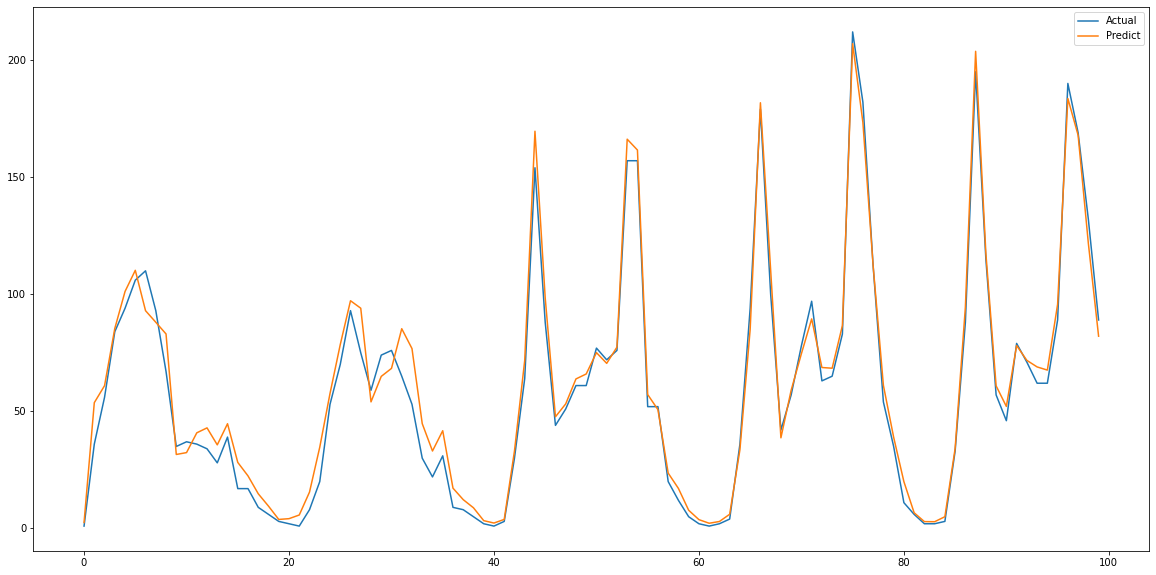

In [64]:
from sklearn.ensemble import RandomForestRegressor
randomforest_model = RandomForestRegressor(n_estimators=100)

y_train_log = np.log1p(y_train)
randomforest_model.fit(X_train, y_train_log)

preds = randomforest_model.predict(X_train)
score_rf = RMSLE(np.exp(y_train_log), np.exp(preds))

print('\n================Evalution Matrix=========================\n')
print ("RMSLE : ", score_rf)

print('\n================Prediction Line Gragh=========================\n')
fig, axes = plt.subplots(1, 1, figsize = (20, 10))
plt.plot(y_train[:100], label = 'Actual')
plt.plot(np.exp(preds)[:100], label = 'Predict')
plt.legend()
plt.show()

### GradientBoost

회귀분석, 분류 분석 수행 가능 예측모형<br>

예측 성능 높다<br>

LightGBM, CatBoost, XGBoost 같은 파이썬 패키지들이 <br>
모두 Gradient Boosting Algorithm을 구현한 패키지<br>

GBM은 계산량이 상당히 많이 필요한 알고리즘이기 때문에, <br>
이를 하드웨어 효율적으로 구현하는 것이 필요한데, <br>
위 패키지들은 모두 GBM을 효율적으로 구현하려고한 패키지들



================Evalution Matrix=========================

RMSLE :  0.23050183929249154

================Prediction Line Gragh=========================



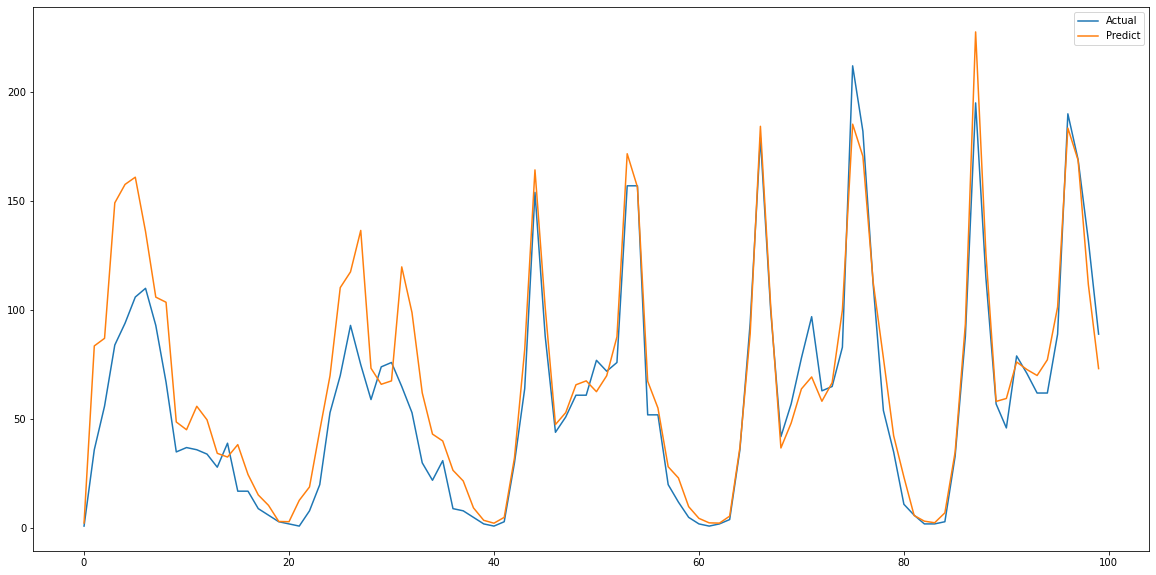

In [65]:
from sklearn.ensemble import GradientBoostingRegressor
gbm = GradientBoostingRegressor(n_estimators = 4000, alpha = 0.01);

y_train_log = np.log1p(y_train)
gbm.fit(X_train, y_train_log)

preds = gbm.predict(X_train)
score = RMSLE(np.exp(y_train_log), np.exp(preds))

print('\n================Evalution Matrix=========================\n')
print ("RMSLE : ", score)

print('\n================Prediction Line Gragh=========================\n')
fig, axes = plt.subplots(1, 1, figsize = (20, 10))
plt.plot(y_train[:100], label = 'Actual')
plt.plot(np.exp(preds)[:100], label = 'Predict')
plt.legend()
plt.show()

### XGBoost

decision tree 앙상블 모델, 부스팅<br>

약한 분류기를 세트로 묶어서 정확도 예측 기법

Greedy Algorithm을 사용하여 분류기를 발견하고 <br>
분산처리를 사용하여 빠른 속도로 적합한 비중 파라미터를 찾는 알고리즘

과적합이 잘일어나지 않는다.

병렬 처리 사용하기에 학습, 분류 빠름

다른 알고리즘과 연계하여 앙상블 학습 가능



================Evalution Matrix=========================

RMSLE :  0.045071379953663934

================Prediction Line Gragh=========================



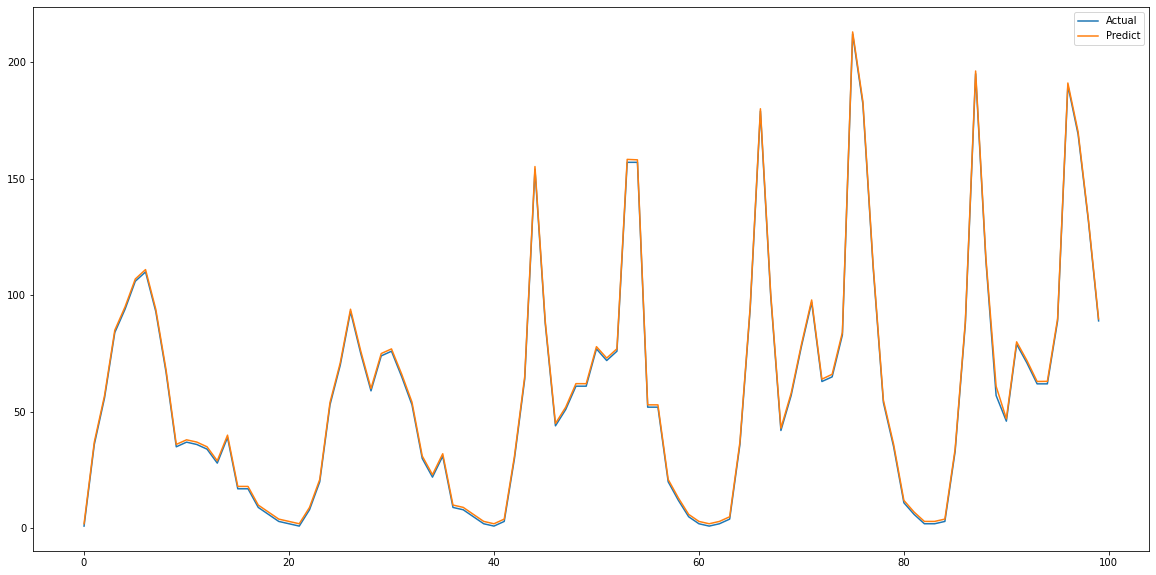


================Feature Important=========================



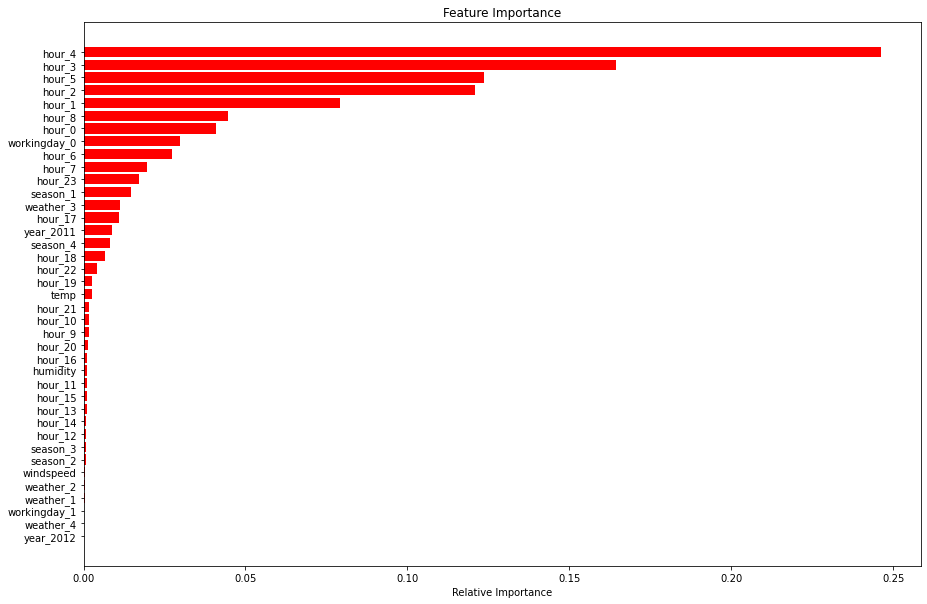

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from xgboost import XGBRegressor
xgb = XGBRegressor(n_estimators = 100, max_depth = 30)

y_train_log = np.log1p(y_train)
xgb.fit(X_train, y_train_log)

preds = xgb.predict(X_train)
score = RMSLE(np.exp(y_train_log), np.exp(preds))

print('\n================Evalution Matrix=========================\n')
print ("RMSLE : ", score)

#n_estimators=80,100,150 중 100
#max_depth=15,20,30 중 30
#성능 좋음

print('\n================Prediction Line Gragh=========================\n')
fig, axes = plt.subplots(1, 1, figsize = (20, 10))
plt.plot(y_train[:100], label = 'Actual')
plt.plot(np.exp(preds)[:100], label = 'Predict')
plt.legend()
plt.show()

print('\n================Feature Important=========================\n')
features = X_train.columns
importances = xgb.feature_importances_
indices = np.argsort(importances)
    
plt.figure(figsize = (15,10))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color = 'red', align = 'center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
    
plt.show()

### CatBoost

오버피팅 해결 위한 기법 알고리즘 포함<br>
일부 가지고 잔차계산 - 모델 생성 - 데이터 잔차는 <br>
이 모델로 예측한 값을 사용

순서 섞어주는 기능 <br>
(오버피팅 방지 위해 트리를 다각적으로 만들려는 시도)



================Evalution Matrix=========================

RMSLE :  0.2450658992385269

================Prediction Line Gragh=========================



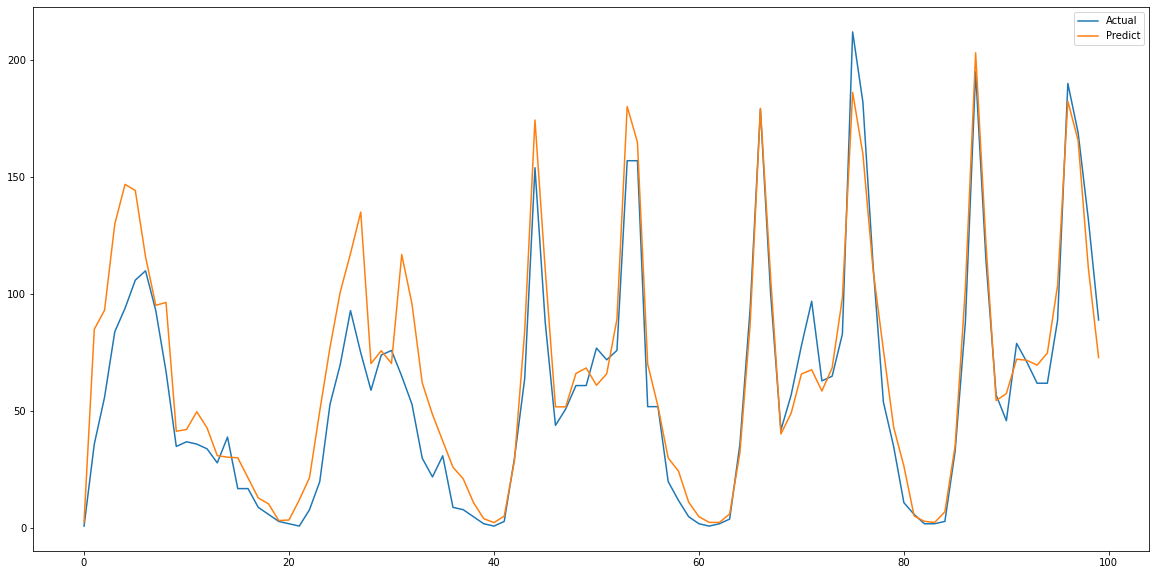


================Feature Important=========================



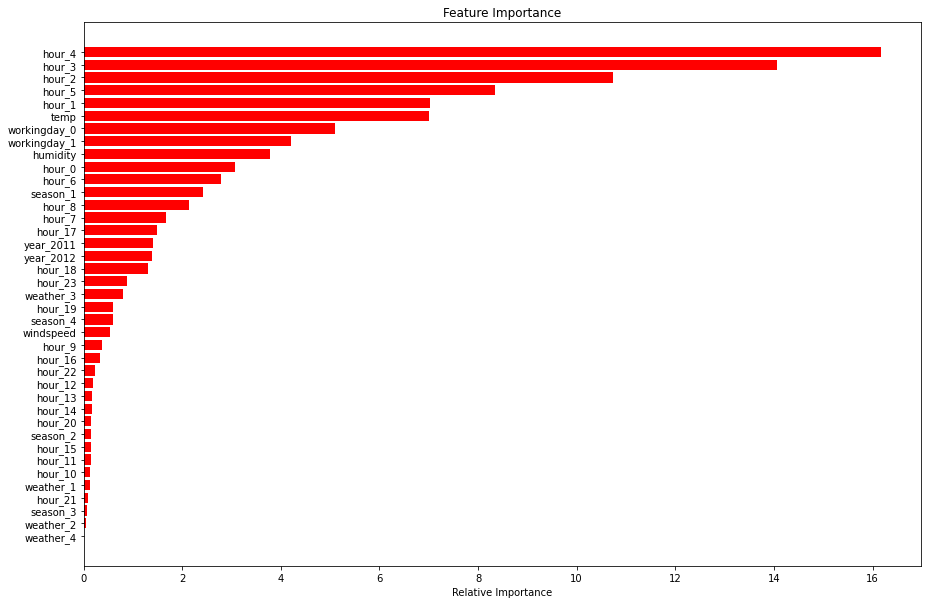

In [67]:
from catboost import CatBoostRegressor
cb = CatBoostRegressor(verbose = 0)

y_train_log = np.log1p(y_train)
cb.fit(X_train, y_train_log)

preds = cb.predict(X_train)
score = RMSLE(np.exp(y_train_log), np.exp(preds))

print('\n================Evalution Matrix=========================\n')
print ("RMSLE : ", score)

print('\n================Prediction Line Gragh=========================\n')
fig, axes = plt.subplots(1, 1, figsize = (20, 10))
plt.plot(y_train[:100], label = 'Actual')
plt.plot(np.exp(preds)[:100], label = 'Predict')
plt.legend()
plt.show()

print('\n================Feature Important=========================\n')
features = X_train.columns
importances = cb.feature_importances_
indices = np.argsort(importances)
    
plt.figure(figsize = (15,10))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color = 'red', align = 'center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
    
plt.show()

### LightGBM

10,000건 이하의 데이터셋 다루는 경우 과적합 문제 발생 쉽다는 단점있음<br>

리프 중심 트리 분할(Leaf Wise) 방식 이용

트리 균형 맞추지 않고 최대 손실 값(max delta loss)을 가지는 <br>
리프 노드를 지속적으로 분할하면서<br>
트리가 깊어지고 비대칭적인 트리 만듦 -> <br>
균형 트리 분할 방식보다 예측 오류 손실을 최소화 한다는 방법 이용

LightGBM vs XGBoost : <br>
빠른 학습/예측 수행 시간, <br>
더 작은 메모리 사용량, <br>
카테고리형 피처의 자동 변환 및 최적 분할



================Evalution Matrix=========================

RMSLE :  0.28663503795745876

================Prediction Line Gragh=========================



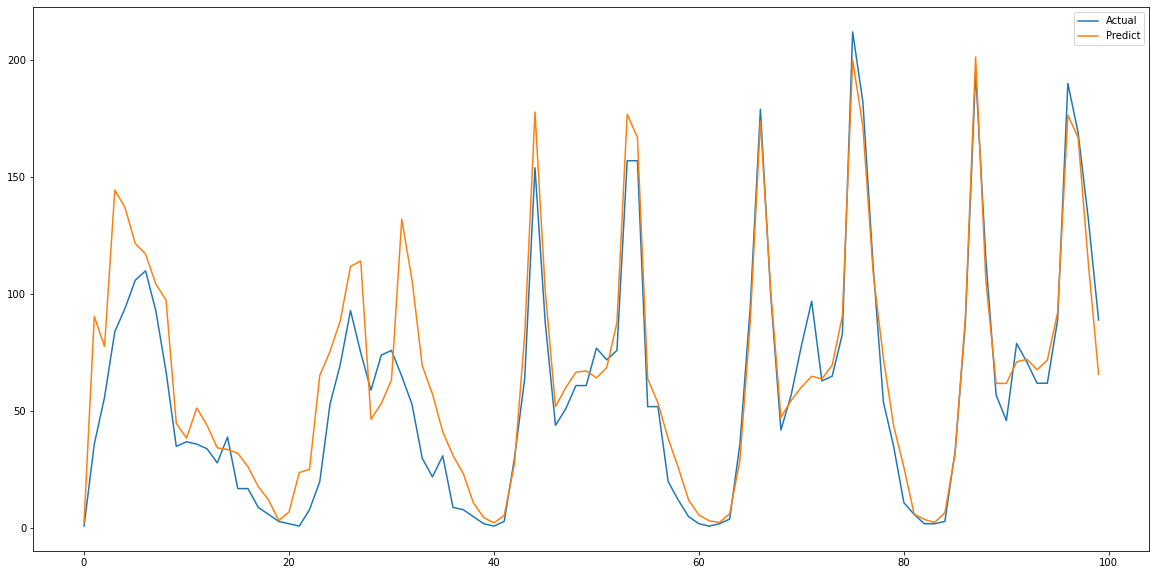


================Feature Important=========================



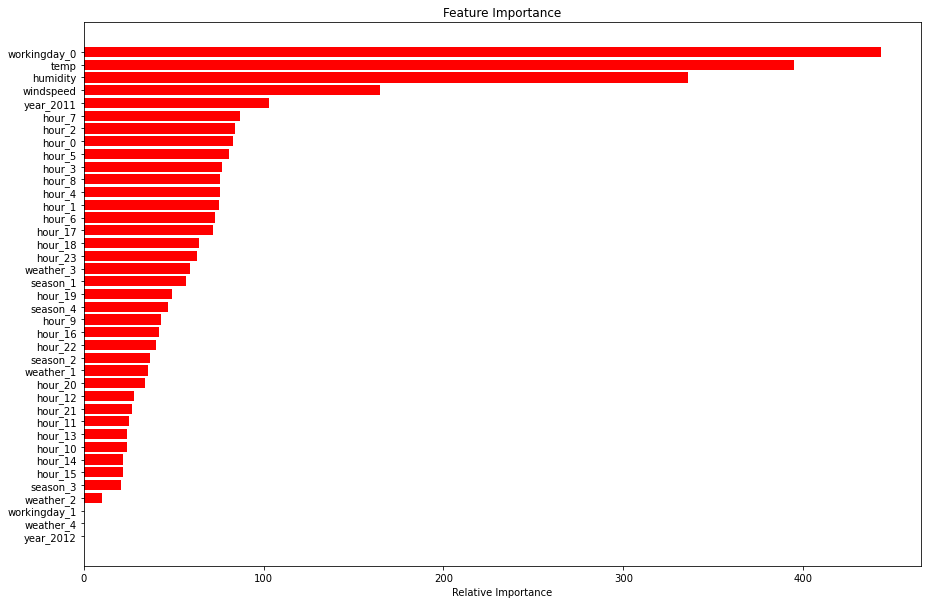

In [68]:
import lightgbm as lgb
lgbr_model = lgb.LGBMRegressor()

lgbr_params_ = {'n_estimators': [150, 200, 250],
                   'max_depth':[7, 10, 13]}

grid_lgbr_model = GridSearchCV(lgbr_model,
                          lgbr_params_,
                          scoring = rmsle_scorer,
                          cv = 5, verbose = 5, n_jobs = -1)

y_train_log = np.log1p(y_train)
lgbr_model.fit(X_train, y_train_log)

lgbr_preds = lgbr_model.predict(X_train)
lgbr_score = RMSLE(np.exp(y_train_log), np.exp(lgbr_preds))

print('\n================Evalution Matrix=========================\n')
print ("RMSLE : ", lgbr_score)

print('\n================Prediction Line Gragh=========================\n')
fig, axes = plt.subplots(1, 1, figsize = (20, 10))
plt.plot(y_train[:100], label = 'Actual')
plt.plot(np.exp(lgbr_preds)[:100], label = 'Predict')
plt.legend()
plt.show()

print('\n================Feature Important=========================\n')
features = X_train.columns
importances = lgbr_model.feature_importances_
indices = np.argsort(importances)
    
plt.figure(figsize = (15,10))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color = 'red', align = 'center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
    
plt.show()

In [72]:
import pandas as pd

model_name = ['Linear', 'Ridge', 'Lasso', 'Elasticnet', 'Random Forest',
              'Gradient Boosting', 'XGboost', 'lightGBM', 'CATBoost']
rmsle_score_list = ['0.5616816006265033', '0.5616812137256105', '0.5621955163993826',
                   '0.5616814600182943', '0.1306798947762178', '0.23050183929249154',
                   '0.045071379953663934', '0.2450658992385269', '0.28663503795745876']

matrices_df = pd.DataFrame({"Model Name":model_name, "RMSLE":rmsle_score_list})

matrices_df

,Model Name,RMSLE
0,Linear,0.5616816006265033
1,Ridge,0.5616812137256105
2,Lasso,0.5621955163993826
3,Elasticnet,0.5616814600182943
4,Random Forest,0.1306798947762178
5,Gradient Boosting,0.23050183929249154
6,XGboost,0.045071379953663934
7,lightGBM,0.2450658992385269
8,CATBoost,0.28663503795745876


### The Best Model is 'xgboost'

In [70]:
#submission 파일 내 count label에 xgb로 예측한 값 생성

submission = pd.read_csv("sampleSubmission.csv")
submission

preds_test = xgb.predict(X_test)

submission["count"] = np.exp(preds_test)

print(submission.shape)
submission.head()

(6493, 2)


,datetime,count
0,2011-01-20 00:00:00,16.058210
1,2011-01-20 01:00:00,3.888803
2,2011-01-20 02:00:00,4.059114
3,2011-01-20 03:00:00,4.458795
4,2011-01-20 04:00:00,3.102867


### Creating Submission CSV File

In [71]:
#count 예측값 csv 파일 생성 및 저장

submission.to_csv("(Kaggle)Score_{0:.5f}_submission.csv".format(score), index=False)

▶ Final RMSLE score is '0.045071379953663934'<br>
▶ Kaggle score is '0.43210'